<a href="https://colab.research.google.com/github/OmarCardoso/Projeto_mercado_imoveis_regress-5oAndar-Colab/blob/main/quintoandar_regressao_imoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Nesta primeira parte são reinstalados alguns pacotes por conta da versão que vem no Google Colab.
!pip install category_encoders
!pip install -U scikit-learn==0.24.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.3 MB 1.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.


#FASE 1 - SOBRE O PROJETO

## 1.1 Sobre o desafio regressão

Nesse desafio, iremos resolver um case de precificação de imóveis. Esse desafio foi construído em parceria entre a Tera e o QuintoAndar, onde o objetivo é simular um projeto de machine learning com características semelhantes ao que ocorre no dia a dia da empresa.

## 1.2 Tarefa de Negócio

Analisar o conjunto de dados que descreve a venda de propriedades residenciais individuais de uma cidade americada, de 2006 a 2010 para gerar insights, tendências e ideias visando o desenvolvimento de estratégias de precificação.

## 1.3 Objetivos

1.3.1 - Interpretabilidade: construir uma regressão simples, com poucas variáveis, visando gerar insights para corretores e proprietários no quesito precificação de imóvel. <br>
1.3.2 - Predição: construir um modelo com alto poder preditivo (Random Forest), com mais variáveis, visando bom desempenho e com intuito de ser usado na página web de cálculo de preço<br>

## 1.4 Entregáveis

1.4.1 - Uma página web com nome de  "calculadora de preço", em que através do input de dados sobre o imóvel (que serão definidos), sejá realizado cálculo e exibido o preço sujerido do preço 
1.4.2 - Um sumário claro com as principais variáveis e carcterísticas chaves que influenciam o valor da venda do imóvel <br>
1.4.3 - Descrição das fontes de dados usadas <br>
1.4.4 - Documentação de todos os tratamentos de dados<br>
1.4.5 - Sumário das análises <br>
1.4.6 - Visualizações gráficas e chaves encontradas<br>
1.4.7 - Baseado nas análises, apresentar os conteúdos de recomendações mais expressivos <br>

## 1.5 Stakeholders:

1.5.1 - Tera Data Science: Treinamento DS e Machine Learning <br>
1.5.2 - Quinto Andar:  Serviços Imobiliários <br>

# FASE 2 - PREPARAÇÃO DAS FONTES

## 2.1 - Informações da fonte de dados

2.1.1 - Os dados foram fornecidos pelos stakeholders armazenados em 1 arquivo csv.<br>
2.1.2 - O conjunto de dados contém 2.930 observações e um grande número de features (23 nominais, 23 ordinais, 14 discretas e 20 contínuas) envolvidas na avaliação do valor dos imóveis, ou seja, são 80 variáveis explicativas.<br>
2.1.3 - Inclui nos dados coletados:<br>
    - 1 - 2930 observações<br>
    - 2 - 23 features nominais cardíacos<br>
    - 3 - 23 features ordinais<br>
    - 4 - 14 features discretas<br>
    - 5 - 20 features contínuas
2.1.4 - O dicionário de dados pode ser encontrado [clicando aqui](https://drive.google.com/file/d/1B3AJBLhDSyNghSVrVnCIr0WudSwQqxBl/view?usp=sharing)   

## 2.2 - Viés (limitações do dataset)
2.1.1 - Os dados foram coletados de 2006 a 2010, assim podem estar desatualizados com relação aos preços atuais.<br>
2.1.2 - Pelo fato de ser uma amostragem de uma cidade americana, onde o perfil geográfico, econômico e populacional<br>
é bem divergente da realidade brasileira, as conclusões serão pertinentes aos EUA. Mesmo assim com distorções, pois,<br>
não sabemos qual a regição e pode haver alterações comportamentais de perfil de acordo com a região nos EUA.
2.1.3 - Pela base ser defasada em 12 anos, existem tecnologias comuns nos dias de hoje que não aparecem. Ex.: Aquecimento com energia fotovotaica<br>

## 2.3 - Verificação da fonte dados com método ROCCC - Reliable, Original, Comprehensive, Current, and Cited

2.3.1 - Reliable (Confiável) - Baixo - Os dados são de uma cidade americana, sem descrição da fonte<br>
2.3.2 - Original (Original) - Baixo - Não conhecemos a fonte<br>
2.3.3 - Comprehensive (Compreensível) - Baixo - Os parâmetros não são coerentes com a realidade brasileira<br>
2.3.4 - Current (Atualizados) - Baixo - Dados de 12 anos atrás <br>
2.3.5 - Cited (Fonte) - Baixo - Dados coletados por terceiros

## 2.4 Dados selecionados e copiados para análise
    . base.csv

# FASE 3 - PREPARAÇÃO DO AMBIENTE

3.1 - Importar as bibliotecas

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from typing import List, Tuple

# Modelling libs
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split 

# Feature importance
from sklearn.inspection import permutation_importance

# Categorical encoders
from category_encoders.target_encoder import TargetEncoder

# Stats libs
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import os

from matplotlib.dates import DateFormatter

sns.set(font_scale=1.2, style="whitegrid")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


3.2 Algumas funções de utilidade que usaremos ao longo deste Notebook


In [5]:
#Função para formatar a matriz de correlação
def plot_corr_matrix(corr_matrix, size=(14, 14)):
  # Set up the matplotlib figure
  fig, ax = plt.subplots(figsize=size)

  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  # Generate a mask for the upper triangle
  mask = np.triu(np.ones_like(corr_matrix.corr(), dtype=np.bool))

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr_matrix.corr(), mask=mask, cmap=cmap, vmax=.99, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})

#Função para calcular o VIF
def calc_vif(df):
  """ 
    Variable Inflation Factors
    VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.
    Reference: https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/#:~:text=Fixing%20Multicollinearity-,What%20is%20Multicollinearity%3F,variable%20in%20a%20regression%20model.
  """
  # Calculating VIF
  vif = pd.DataFrame()
  vif["variables"] = df.columns
  vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

  return(vif)

#Função para plotar o VIF
def plot_vif(vif):
  print('vars: ', list(vif.columns))
  print('Variable Inflation Factors:', vif.VIF.sum(), '\n')

#Função para criar Datasets de Treino, validação e teste
def train_test_valid_split(
    df: pd.DataFrame,
    features: list,
    target: str,
    test_size: float,
    valid_size: float,
    random_state: int,
) -> Tuple[np.array, np.array, np.array, np.array, np.array, np.array]:
    """Splits dataframe in training, testing and validation sets"""

    # The first train/test split
    (X_train, X_test, y_train, y_test) = train_test_split(
        df[features],
        df[target],
        test_size=test_size,
        random_state=random_state,
    )

    # The second train/test split
    (X_test, X_val, y_test, y_val) = train_test_split(
        X_test, y_test, test_size=valid_size, random_state=random_state
    )

    return X_train, X_test, X_val, y_train, y_test, y_val

# Função de métricas
def metrics_report(y, y_pred, dataset_name='valid'):
  mean_y = np.mean(y)
  mean_pred = np.mean(y_pred)

  rmse = round(math.sqrt(mean_squared_error(y, y_pred)), 2)
  mae = mean_absolute_error(y, y_pred)
  r2 = r2_score(y, y_pred)
  mape = mean_absolute_percentage_error(y, y_pred)
  
  report = pd.DataFrame({
    'metric': ['RMSE', 'MAE', 'R^2', 'MAPE', 'Avg. target', 'Avg. Prediction'],
    dataset_name: [rmse, mae, r2, mape, mean_y, mean_pred]
  })

  report[dataset_name] = report[dataset_name].round(2)
  return report

3.3 Importar dataset

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/tera/5oandar/dataset/base.csv")

df.drop('Id', axis=1, inplace=True)
df.shape

(1460, 80)

In [7]:
df.head()

,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,Beco,FormaProp,PlanoProp,Servicos,ConfigLote,...,AreaPiscina,QualidadePiscina,QualidadeCerca,Outros,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ClasseImovel          1460 non-null   int64  
 1   ClasseZona            1460 non-null   object 
 2   Fachada               1201 non-null   float64
 3   TamanhoLote           1460 non-null   int64  
 4   Rua                   1460 non-null   object 
 5   Beco                  91 non-null     object 
 6   FormaProp             1460 non-null   object 
 7   PlanoProp             1460 non-null   object 
 8   Servicos              1460 non-null   object 
 9   ConfigLote            1460 non-null   object 
 10  InclinacaoLote        1460 non-null   object 
 11  Bairro                1460 non-null   object 
 12  Estrada1              1460 non-null   object 
 13  Estrada2              1460 non-null   object 
 14  TipoHabitacao         1460 non-null   object 
 15  EstiloHabitacao      

3.4 Estruturação das variáveis

In [9]:
# Variável de interesse
target = 'PrecoVenda'
print('target:', target)

target: PrecoVenda


In [10]:
# Variaveis numericas
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()
num_vars.remove('ClasseImovel')
num_vars.remove(target)
print(f'numerical vars({len(num_vars)}): {num_vars}')

numerical vars(35): ['Fachada', 'TamanhoLote', 'Qualidade', 'Condicao', 'AnoConstrucao', 'AnoReforma', 'AreaAlvenaria', 'AreaAcabPorao1', 'AreaAcabPorao2', 'AreaInacabPorao', 'AreaPorao', 'AreaTerreo', 'Area2Andar', 'BaixaQualiAreaAcab', 'AreaConstruida', 'BanheiroPorao', 'LavaboPorao', 'Banheiro', 'Lavabo', 'BedroomAbvGr', 'KitchenAbvGr', 'TotalQuartos', 'Lareira', 'AnoGaragem', 'CarrosGaragem', 'AreaGaragem', 'AreaDeck', 'AreaVarandaAberta', 'AreaVarandaFechada', 'AreaVaranda3Estacoes', 'AreaAlpendre', 'AreaPiscina', 'ValorOutros', 'MesVenda', 'AnoVenda']


In [11]:
# Variáveis categóricas
cat_vars = df.select_dtypes(exclude=['int', 'float']).columns.tolist()
cat_vars.append('ClasseImovel')
print(f'categorical vars({len(cat_vars)}): {cat_vars}')

categorical vars(44): ['ClasseZona', 'Rua', 'Beco', 'FormaProp', 'PlanoProp', 'Servicos', 'ConfigLote', 'InclinacaoLote', 'Bairro', 'Estrada1', 'Estrada2', 'TipoHabitacao', 'EstiloHabitacao', 'TipoTelhado', 'MaterialTelhado', 'Exterior1', 'Exterior2', 'TipoAlvenaria', 'QualidadeCobertura', 'CondicaoExterna', 'TipoFundacao', 'AlturaPorao', 'CondicaoPorao', 'ParedePorao', 'TipoAcabPorao1', 'TipoAcabPorao2', 'Aquecimento', 'QualidadeAquecimento', 'ArCentral', 'InstalacaoEletrica', 'QualidadeCozinha', 'Funcionalidade', 'QualdiadeLareira', 'LocalGaragem', 'AcabamentoGaragem', 'QualidadeGaragem', 'CondicaoGaragem', 'EntradaPavimentada', 'QualidadePiscina', 'QualidadeCerca', 'Outros', 'TipoVenda', 'CondicaoVenda', 'ClasseImovel']


# FASE 4 - ANÁLISE EXPLORATÓRIA

In [12]:
# Cria Log do preço de venda
df['LogPrecoVenda'] = np.log(df['PrecoVenda'].values)

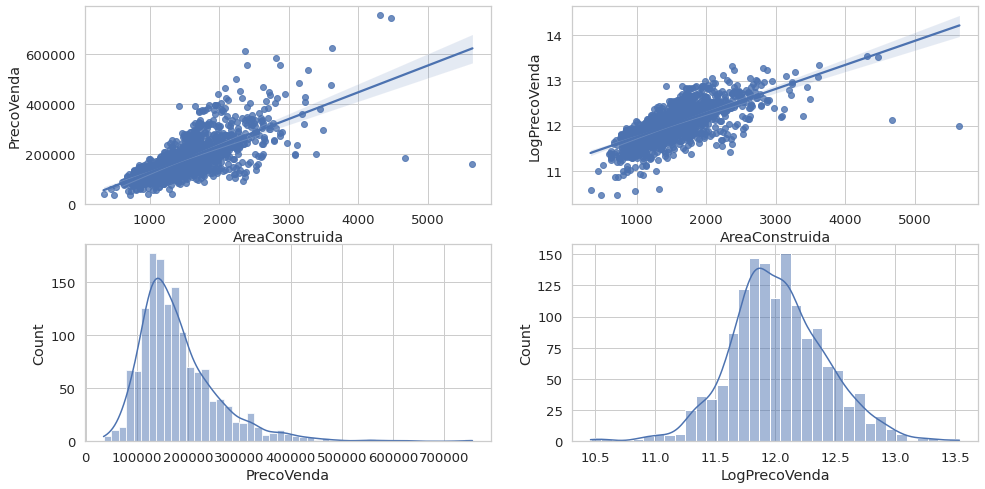

In [13]:
# Gráfico de regressão linear da Área construída
fig, axs = plt.subplots(figsize=(16,8), ncols=2, nrows=2)

sns.histplot(x=df.PrecoVenda, kde=True, ax=axs[1][0])
sns.histplot(x=df.LogPrecoVenda, kde=True, ax=axs[1][1])

sns.regplot(x='AreaConstruida', y='PrecoVenda', data=df, ax=axs[0][0])
sns.regplot(x='AreaConstruida', y='LogPrecoVenda', data=df, ax=axs[0][1])

plt.show()

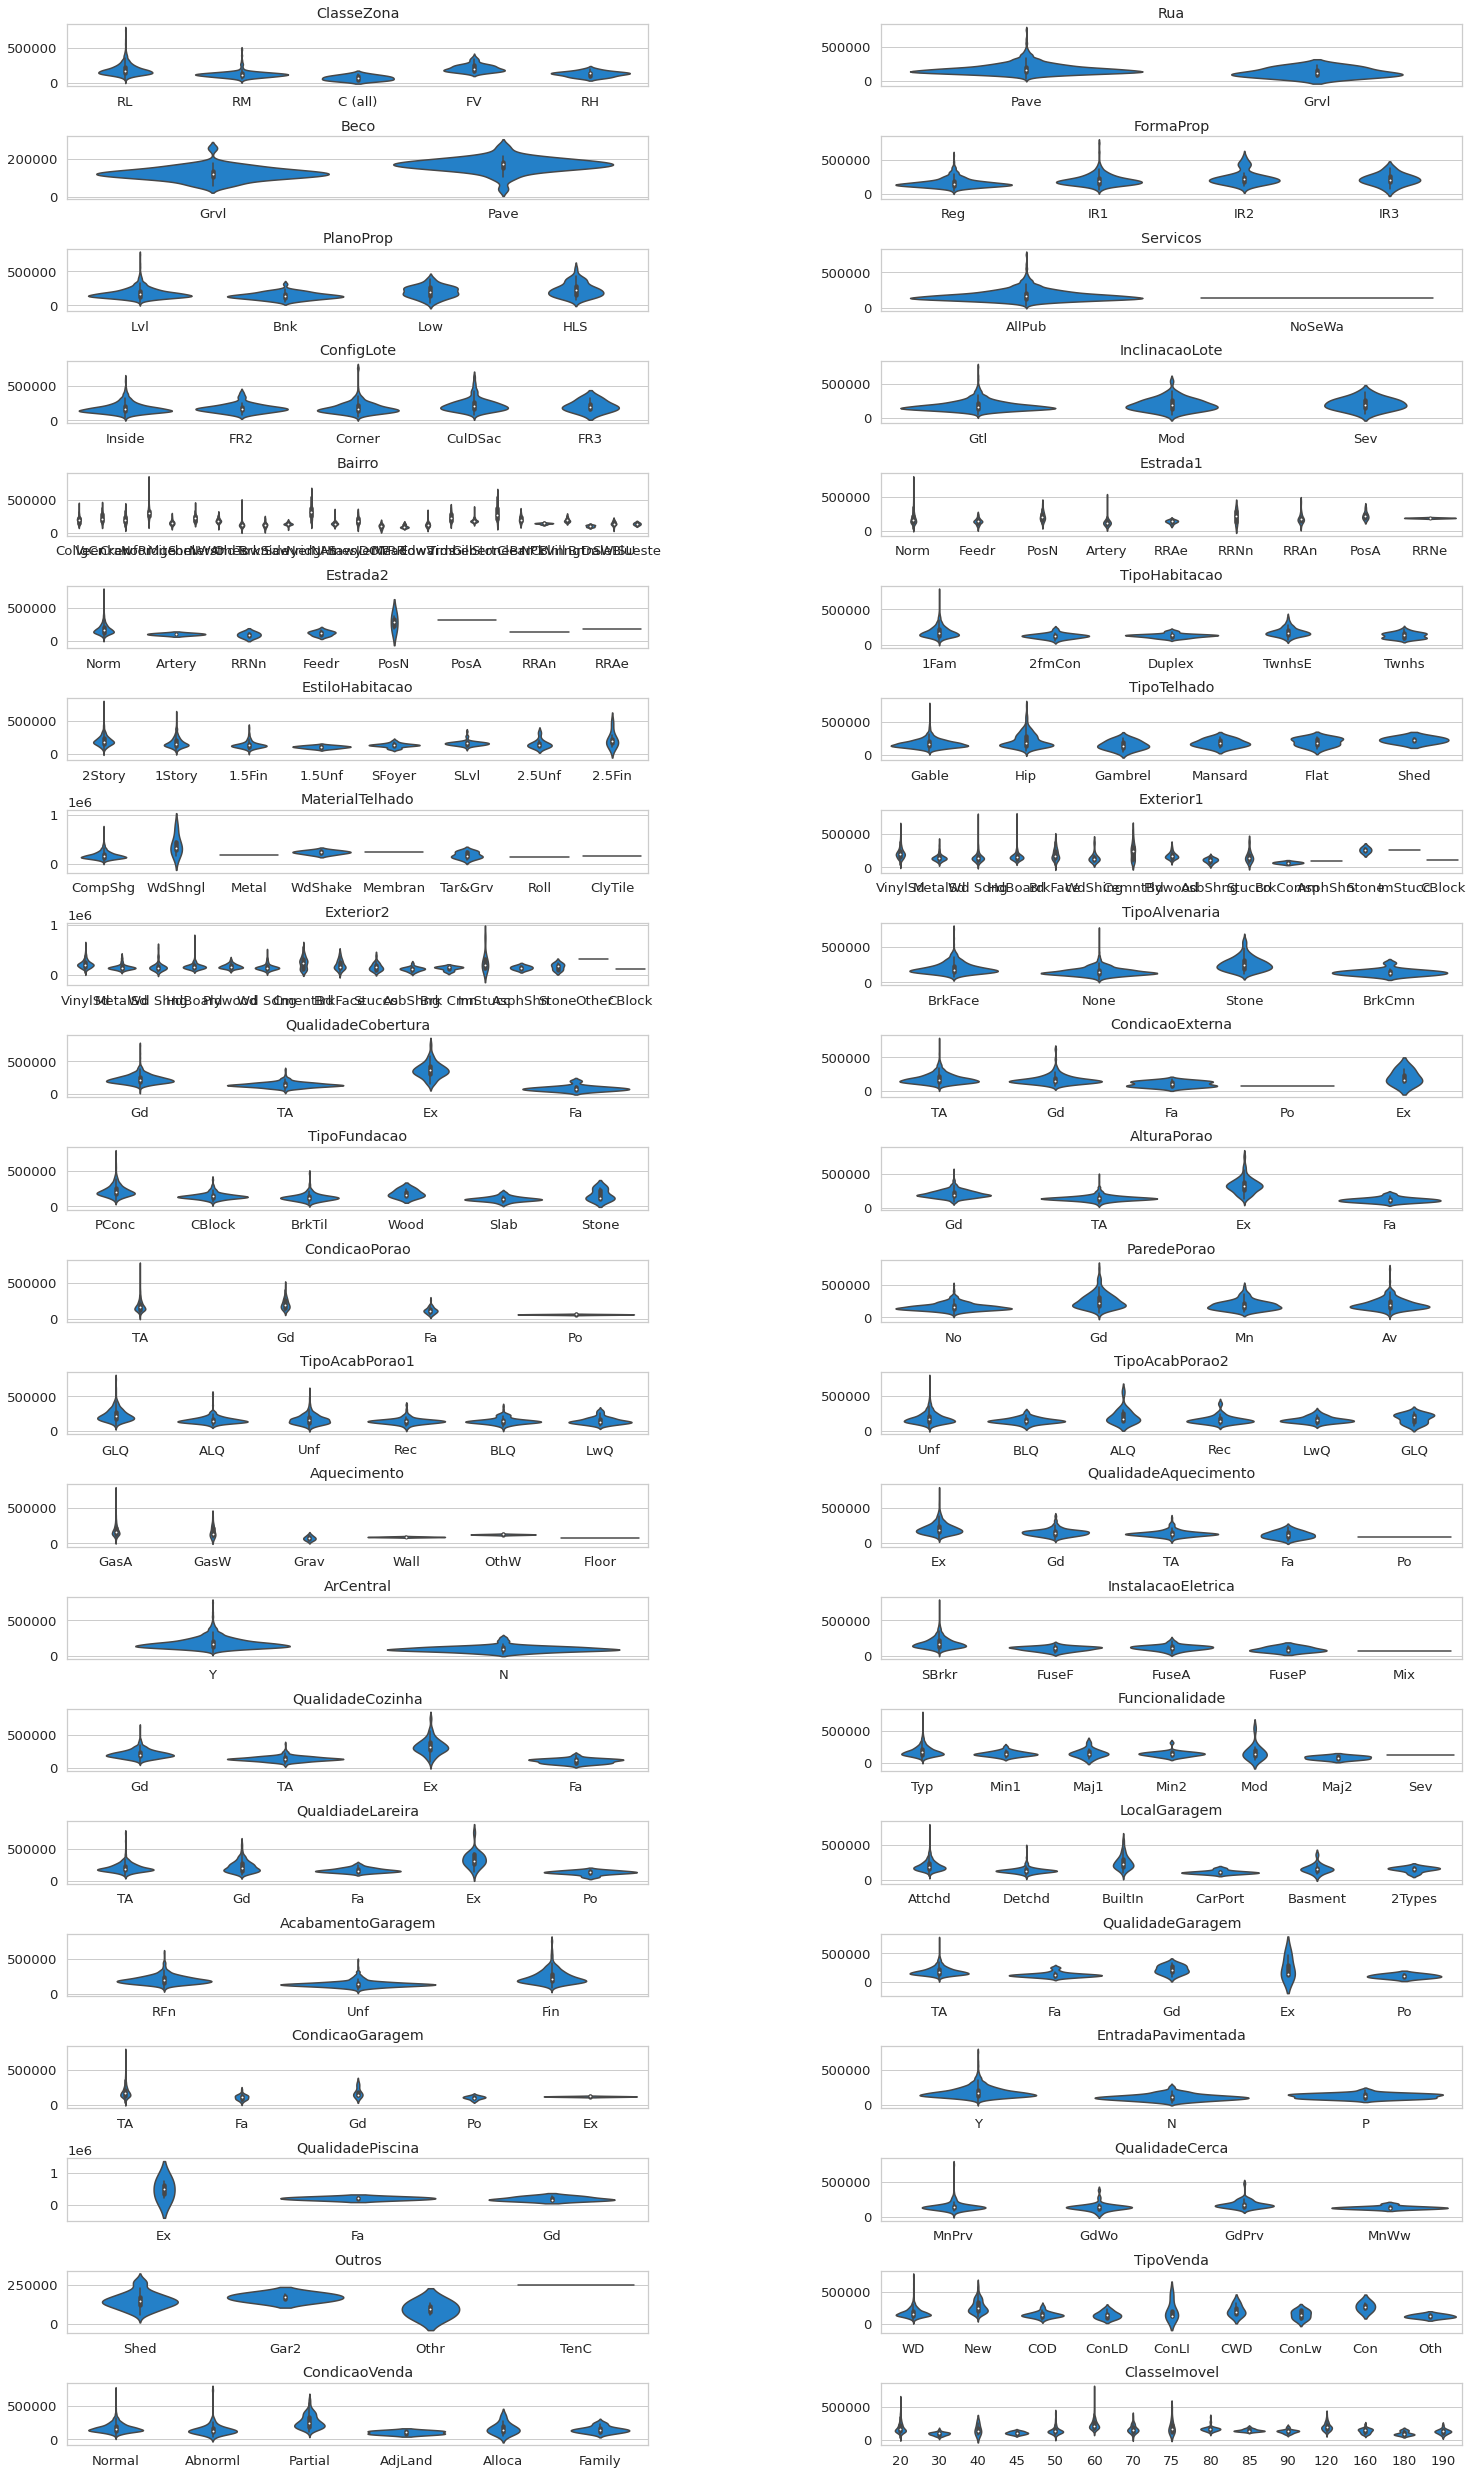

In [14]:
# Análise das Features Categóricas

# Configurando a figura do matplot lib
fig = plt.figure(figsize=(25,90))
fig.subplots_adjust(hspace=0.8, wspace=0.4)

total_plots = len(cat_vars)
i = 0
# Iterando para todas variaveis categoricas
for var in cat_vars:
    # Pegando o index certo para plotar o grafico
    ax = fig.add_subplot(total_plots, 2, i+1)
    # Desenhando o grafico do tipo violinplot
    sns.violinplot(x=var, y=target, color='#0984e3', title=var,data=df, ax=ax)
    ax.set_title(var)
    ax.set_ylabel('')
    ax.set_xlabel('')
    i += 1

plt.show()

Verificando a cardinalidade das variáveis categóricas

In [15]:
print('Cardinalidade médias das categóricas:', np.mean(df[cat_vars].nunique()))
df[cat_vars].nunique().sort_values(ascending=False)

Cardinalidade médias das categóricas: 6.068181818181818


Bairro                  25
Exterior2               16
ClasseImovel            15
Exterior1               15
Estrada1                 9
TipoVenda                9
MaterialTelhado          8
EstiloHabitacao          8
Estrada2                 8
Funcionalidade           7
TipoAcabPorao1           6
LocalGaragem             6
TipoTelhado              6
CondicaoVenda            6
Aquecimento              6
TipoFundacao             6
TipoAcabPorao2           6
QualdiadeLareira         5
QualidadeGaragem         5
CondicaoGaragem          5
InstalacaoEletrica       5
QualidadeAquecimento     5
ClasseZona               5
ConfigLote               5
TipoHabitacao            5
CondicaoExterna          5
FormaProp                4
Outros                   4
QualidadeCerca           4
PlanoProp                4
ParedePorao              4
QualidadeCozinha         4
TipoAlvenaria            4
QualidadeCobertura       4
AlturaPorao              4
CondicaoPorao            4
InclinacaoLote           3
A

Verificando a correlação entre as variáveis numéricas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


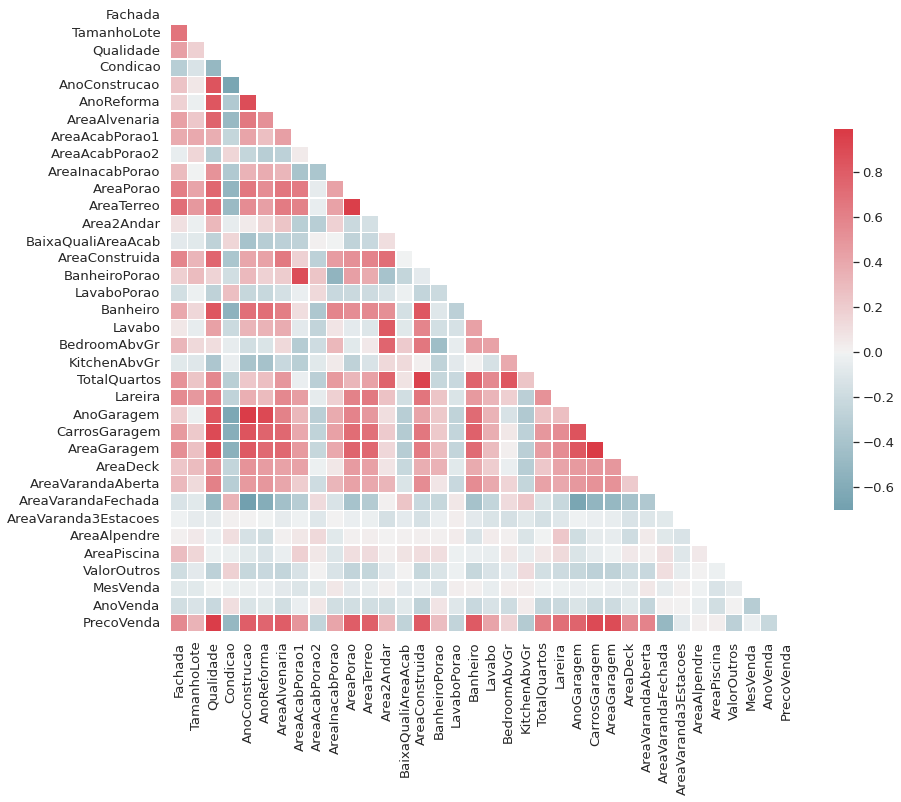

In [16]:
corr_matrix = df[num_vars + [target]].corr()
plot_corr_matrix(corr_matrix)

Correlação das variáveis numéricas com a variável de interesse (PrecoVenda)

In [17]:
corr_matrix[target].sort_values(ascending=False)

PrecoVenda              1.000000
Qualidade               0.790982
AreaConstruida          0.708624
CarrosGaragem           0.640409
AreaGaragem             0.623431
AreaPorao               0.613581
AreaTerreo              0.605852
Banheiro                0.560664
TotalQuartos            0.533723
AnoConstrucao           0.522897
AnoReforma              0.507101
AnoGaragem              0.486362
AreaAlvenaria           0.477493
Lareira                 0.466929
AreaAcabPorao1          0.386420
Fachada                 0.351799
AreaDeck                0.324413
Area2Andar              0.319334
AreaVarandaAberta       0.315856
Lavabo                  0.284108
TamanhoLote             0.263843
BanheiroPorao           0.227122
AreaInacabPorao         0.214479
BedroomAbvGr            0.168213
AreaAlpendre            0.111447
AreaPiscina             0.092404
MesVenda                0.046432
AreaVaranda3Estacoes    0.044584
AreaAcabPorao2         -0.011378
LavaboPorao            -0.016844
ValorOutro

# FASE 5 - PROCESSO

## 5.1 - Pré-Preprocessamento, limpeza dos dados, construção de features

5.1 Removendo algumas colunas com muitos dados faltantes, ou que não fazem sentido para a resolução do problema

In [18]:
# Verifica features nulas
nans = df.isna().sum()
nans = nans[nans > 0]/len(df)
nans[nans > 0.95]


QualidadePiscina    0.995205
Outros              0.963014
dtype: float64

In [19]:
# Cria variável com colunas a serem removidas
cols_to_remove = ['QualidadePiscina', 'Outros', 'AnoVenda']

5.2 - Criando novas features (feature engineering)

In [20]:
# Selecionando apenas as features de area
area_features = [var for var in num_vars if 'area' in var.lower()]

In [21]:
# Eleveando ao quadrado as features de area
df_area_squared = df[area_features].pow(2)
df_area_squared.columns = [var + '_squared' for var in area_features]
df_processed = pd.concat([df, df_area_squared], axis=1)
print('New are squared features: ', list(df_area_squared.columns))

New are squared features:  ['AreaAlvenaria_squared', 'AreaAcabPorao1_squared', 'AreaAcabPorao2_squared', 'AreaInacabPorao_squared', 'AreaPorao_squared', 'AreaTerreo_squared', 'Area2Andar_squared', 'BaixaQualiAreaAcab_squared', 'AreaConstruida_squared', 'AreaGaragem_squared', 'AreaDeck_squared', 'AreaVarandaAberta_squared', 'AreaVarandaFechada_squared', 'AreaVaranda3Estacoes_squared', 'AreaAlpendre_squared', 'AreaPiscina_squared']


In [22]:
# Dividino o total de alguns itens pela area construida
itens = ['Banheiro', 'Lavabo', 'TotalQuartos', 'Lareira', 'CarrosGaragem']
df_itens_over_area = df_processed[itens].div(df_processed.AreaConstruida, axis=0)
df_itens_over_area.columns = [var + '_sobreArea' for var in itens]
df_processed = pd.concat([df_processed, df_itens_over_area], axis=1)
print('New itens over area features: ', list(df_itens_over_area.columns))

New itens over area features:  ['Banheiro_sobreArea', 'Lavabo_sobreArea', 'TotalQuartos_sobreArea', 'Lareira_sobreArea', 'CarrosGaragem_sobreArea']


In [23]:
# Removendo colunas com muitos missings
df_processed.drop(cols_to_remove, axis=1, inplace=True)

In [24]:
# Shape do novo dataset processado
print('Shape old df: ', df.shape)
print('Shape new df: ', df_processed.shape)

Shape old df:  (1460, 81)
Shape new df:  (1460, 99)


5.3 - Selecionando novamente as variáveis numéricas e categóricas no dataset processado

In [25]:
# Features numericas
num_features = df_processed.select_dtypes(include=['int', 'float']).columns.tolist()
num_features.remove('ClasseImovel')
num_features.remove('LogPrecoVenda')
num_features.remove('PrecoVenda')
print(f'numerical features({len(num_features)}): {num_features}')

# Features categoricas
cat_features = df_processed.select_dtypes(exclude=['int', 'float']).columns.tolist()
cat_features.append('ClasseImovel')
df_processed[cat_features] = df_processed[cat_features].astype("category")
print(f'categorical features({len(cat_features)}): {cat_features}')

# features_to_remove = ['AnoVenda', 'LogPrecoVenda', 'PrecoVenda']

numerical features(55): ['Fachada', 'TamanhoLote', 'Qualidade', 'Condicao', 'AnoConstrucao', 'AnoReforma', 'AreaAlvenaria', 'AreaAcabPorao1', 'AreaAcabPorao2', 'AreaInacabPorao', 'AreaPorao', 'AreaTerreo', 'Area2Andar', 'BaixaQualiAreaAcab', 'AreaConstruida', 'BanheiroPorao', 'LavaboPorao', 'Banheiro', 'Lavabo', 'BedroomAbvGr', 'KitchenAbvGr', 'TotalQuartos', 'Lareira', 'AnoGaragem', 'CarrosGaragem', 'AreaGaragem', 'AreaDeck', 'AreaVarandaAberta', 'AreaVarandaFechada', 'AreaVaranda3Estacoes', 'AreaAlpendre', 'AreaPiscina', 'ValorOutros', 'MesVenda', 'AreaAlvenaria_squared', 'AreaAcabPorao1_squared', 'AreaAcabPorao2_squared', 'AreaInacabPorao_squared', 'AreaPorao_squared', 'AreaTerreo_squared', 'Area2Andar_squared', 'BaixaQualiAreaAcab_squared', 'AreaConstruida_squared', 'AreaGaragem_squared', 'AreaDeck_squared', 'AreaVarandaAberta_squared', 'AreaVarandaFechada_squared', 'AreaVaranda3Estacoes_squared', 'AreaAlpendre_squared', 'AreaPiscina_squared', 'Banheiro_sobreArea', 'Lavabo_sobreAre

## 5.2 - Objetivo 1 - Regressão Linear para interpretabilidade

Utilizando apenas exemplos onde a variável Condicao é igual à Normal

In [26]:
df_lr = df_processed[df_processed.CondicaoVenda == 'Normal'].copy()
df_lr = pd.get_dummies(df_lr, columns=['ArCentral'], drop_first=True)

# Valores da var QualidadeCozinha:
# Ex Excelente
# Gd Bom
# TA Médio / Comum
# Fa Razoável
# Po Ruim

df_lr['QualidadeCozinha'] = df_lr['QualidadeCozinha'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
len(df_lr)

1198

Usando o VIF (Variance Inflation Factor) para verificar a colinearidade de certos conjutos de variáveis

In [27]:
lr_vars = ['AreaConstruida', 'CarrosGaragem', 'ArCentral_Y', 'AreaPorao', 'Banheiro', 'QualidadeCozinha'] # R2 0.824
plot_vif(calc_vif(df_lr[lr_vars]))

lr_vars = ["AreaConstruida", "Qualidade", "CarrosGaragem", "AreaPorao", "Banheiro", "ArCentral_Y"] # R2 0.852
plot_vif(calc_vif(df_lr[lr_vars]))

vars:  ['variables', 'VIF']
Variable Inflation Factors: 90.16591366626693 

vars:  ['variables', 'VIF']
Variable Inflation Factors: 108.14489255540519 



Fitando a regressão linear

In [28]:
# Montando a formula da regressao linear
lr_vars = ["AreaConstruida", "Qualidade", "CarrosGaragem", "AreaPorao", "Banheiro", "ArCentral_Y"] # R2 0.852
formula ="LogPrecoVenda ~ " + ' + '.join(lr_vars)
print('formula: ', formula)

# Criando o modelo de regressão linear
model = smf.ols(formula = formula, data = df_lr).fit()

# Plotando o sumario do modelo
print(model.summary())

formula:  LogPrecoVenda ~ AreaConstruida + Qualidade + CarrosGaragem + AreaPorao + Banheiro + ArCentral_Y
                            OLS Regression Results                            
Dep. Variable:          LogPrecoVenda   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1139.
Date:                Wed, 27 Jul 2022   Prob (F-statistic):               0.00
Time:                        09:22:26   Log-Likelihood:                 644.77
No. Observations:                1198   AIC:                            -1276.
Df Residuals:                    1191   BIC:                            -1240.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

Verificando o VIF das variáveis escolhidas para compor a regressão linear

In [29]:
vif = calc_vif(df_lr[lr_vars])
print('vars: ', lr_vars)
print('Variable Inflation Factors:', vif.VIF.sum(), '\n')
vif

vars:  ['AreaConstruida', 'Qualidade', 'CarrosGaragem', 'AreaPorao', 'Banheiro', 'ArCentral_Y']
Variable Inflation Factors: 108.14489255540519 



,variables,VIF
0,AreaConstruida,20.561712
1,Qualidade,36.544938
2,CarrosGaragem,11.040106
3,AreaPorao,10.491630
4,Banheiro,17.210607
5,ArCentral_Y,12.295900


Correlação das variáveis da regressão linear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


,AreaConstruida,Qualidade,CarrosGaragem,AreaPorao,Banheiro,ArCentral_Y
AreaConstruida,1.000000,0.576861,0.465061,0.383522,0.650396,0.076536
Qualidade,0.576861,1.000000,0.564465,0.494476,0.525825,0.255123
CarrosGaragem,0.465061,0.564465,1.000000,0.409797,0.452606,0.211898
AreaPorao,0.383522,0.494476,0.409797,1.000000,0.304859,0.202598
Banheiro,0.650396,0.525825,0.452606,0.304859,1.000000,0.074507
ArCentral_Y,0.076536,0.255123,0.211898,0.202598,0.074507,1.000000


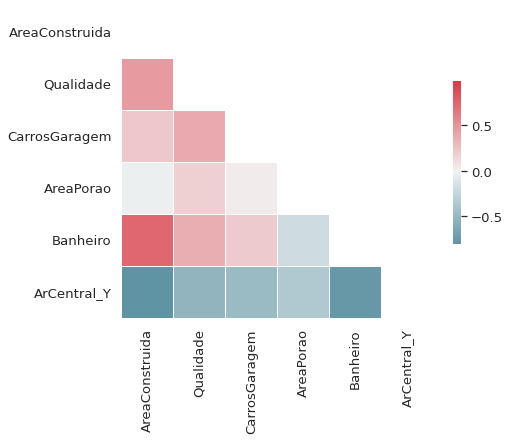

In [30]:
corr_matrix = df_lr[lr_vars].corr()
plot_corr_matrix(df_lr[lr_vars].corr(), (7, 6))
corr_matrix

Checando a Heteroscedasticidade (aumento do erro conforme aumenta a área do imóvel)

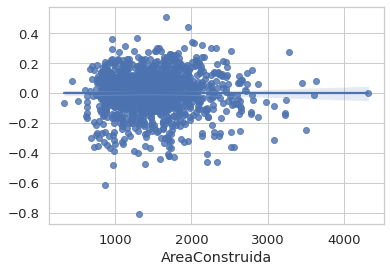

In [31]:
sns.regplot(x=df_lr.AreaConstruida , y=model.resid)

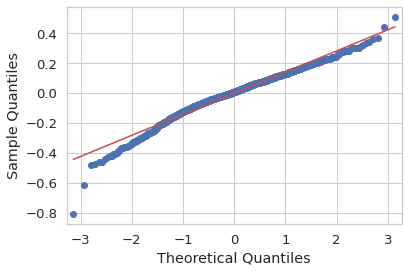

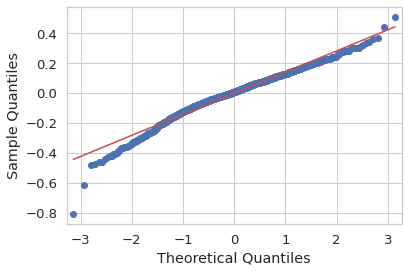

In [33]:
sm.qqplot(model.resid, line="s")

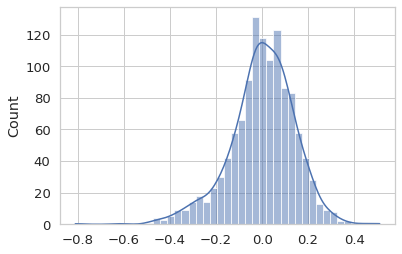

In [34]:
sns.histplot(model.resid, kde=True)

In [35]:
round((np.exp(model.params[1:]) - 1)*100, 2)

AreaConstruida     0.02
Qualidade         10.58
CarrosGaragem      9.41
AreaPorao          0.02
Banheiro           1.56
ArCentral_Y       24.58
dtype: float64

## 5.3 Interpretação dos coeficientes

* AreaConstruida     0.02% (Aumento de 1 unidade da AreaConstruida aumenta em 0.02% o preço do imóvel)
* Qualidade         10.58% (Para cada aumento do nível de qualidade, indo de 1-muito ruim até 10-Muito excelente, aumenta em 10.58% o preço do imóvel)
* CarrosGaragem      9.41% (Aumento de 1 unidade de CarrosGaragem aumenta em 9.41% o preço do imóvel)
* AreaPorao          0.02% (Aumento de 1 unidade da AreaPorao aumenta em 0.02% o preço do imóvel)
* Banheiro           1.56% (Aumento de 1 unidade de Banheiros aumenta em 1.56% o preço do imóvel)
* ArCentral_Y       24.58% (Presença de ar condicionado central aumenta 24.58% o valor do imóvel)

## 5.4 - Objetivo II: poder preditivo, regressão via random forest

Splitando os dados em treino e teste

In [37]:
features = num_features + cat_features
# TO-DO rever essa parte
# features = [feature for feature in features if feature not in features_to_remove]

(
  X_train, X_test, 
  X_val, y_train, 
  y_test, y_val
) = train_test_valid_split(df_processed, features=features, target=target, test_size=0.3, valid_size=0.5, random_state=42)

print('X Train shape', X_train.shape)
print('X Val shape', X_val.shape)
print('X Test shape', X_test.shape)

X Train shape (1022, 97)
X Val shape (219, 97)
X Test shape (219, 97)


Pre-processamento dos datasets de treino, teste e validação

In [39]:
def random_forest_preprocessing(X_train, X_val, X_test, y_train):

  # Categoricals pre-processing (missing imputer)
  cat_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  X_train[cat_features] = cat_imputer.fit_transform(X_train[cat_features])
  X_val[cat_features] = cat_imputer.transform(X_val[cat_features])
  X_test[cat_features] = cat_imputer.transform(X_test[cat_features])

  cat_imputer = SimpleImputer(missing_values=None, strategy='most_frequent')
  X_train[cat_features] = cat_imputer.fit_transform(X_train[cat_features])
  X_val[cat_features] = cat_imputer.transform(X_val[cat_features])
  X_test[cat_features] = cat_imputer.transform(X_test[cat_features])

  # Categoricals pre-processing (categorical encoders)
  target_encoder = TargetEncoder()
  X_train[cat_features] = target_encoder.fit_transform(X_train[cat_features], y_train)
  X_val[cat_features] = target_encoder.transform(X_val[cat_features])
  X_test[cat_features] = target_encoder.transform(X_test[cat_features])

  # Numerical pre-processing (missing imputer)
  num_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
  X_train[num_features] = num_imputer.fit_transform(X_train[num_features])
  X_val[num_features] = num_imputer.transform(X_val[num_features])
  X_test[num_features] = num_imputer.transform(X_test[num_features])

  return X_train, X_val, X_test

X_train, X_val, X_test = random_forest_preprocessing(X_train.copy(), X_val.copy(), X_test.copy(), y_train)

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


Fitando um RandomForest baseline

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf_baseline = RandomForestRegressor(random_state=42)
# Treino
rf_baseline.fit(X_train, y_train)

y_val_baseline_pred = rf_baseline.predict(X_val)
baseline_report = metrics_report(y_val, y_val_baseline_pred, 'validation')
baseline_report

,metric,validation
0,RMSE,28201.24
1,MAE,16561.61
2,R^2,0.90
3,MAPE,0.09
4,Avg. target,174313.75
5,Avg. Prediction,171594.96


Achando os melhores hiperparâmetros para o RandomForest

In [41]:
# hiperparams: n_estimators: [], max_features: [], min_samples_leaf: []
for n_estimators in [10, 30, 50, 70, 100, 150, 200]:
  print(f'Random forest, with n_estimators {n_estimators}')
  rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
  rf_model.fit(X_train, y_train)
  y_val_pred = rf_model.predict(X_val)
  rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))
  print(f'rmse: {rmse}\n')

Random forest, with n_estimators 10
rmse: 29830.096709926394

Random forest, with n_estimators 30
rmse: 29456.04901134411

Random forest, with n_estimators 50
rmse: 29504.202718893208

Random forest, with n_estimators 70
rmse: 28401.53851655764

Random forest, with n_estimators 100
rmse: 28201.241333441532

Random forest, with n_estimators 150
rmse: 28303.09381373777

Random forest, with n_estimators 200
rmse: 28461.653877996003



In [42]:
# hiperparams: n_estimators: [150], max_features: [], min_samples_leaf: []
for max_features in ['sqrt', 0.1, 0.2, 0.3, 0.4, 0.6]:
  print(f'Random forest, with max_features {max_features}')
  rf_model = RandomForestRegressor(n_estimators=150, max_features=max_features, random_state=42)
  rf_model.fit(X_train, y_train)
  y_val_pred = rf_model.predict(X_val)
  rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))
  print(f'rmse: {rmse}\n')

Random forest, with max_features sqrt
rmse: 29460.103049913483

Random forest, with max_features 0.1
rmse: 29460.103049913483

Random forest, with max_features 0.2
rmse: 28362.761607611334

Random forest, with max_features 0.3
rmse: 27113.51143598948

Random forest, with max_features 0.4
rmse: 27474.68330443565

Random forest, with max_features 0.6
rmse: 27624.867528230505



In [43]:
# hiperparams: n_estimators: [100], max_features: [0.3], min_samples_leaf: []
for min_samples_leaf in list(range(1,6)):
  print(f'Random forest, with min_samples_leaf {min_samples_leaf}')
  rf_model = RandomForestRegressor(n_estimators=150, max_features=0.3, min_samples_leaf= min_samples_leaf, random_state=42)
  rf_model.fit(X_train, y_train)
  y_val_pred = rf_model.predict(X_val)
  rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))
  print(f'rmse: {rmse}\n')

Random forest, with min_samples_leaf 1
rmse: 27113.51143598948

Random forest, with min_samples_leaf 2
rmse: 27968.612891251596

Random forest, with min_samples_leaf 3
rmse: 29346.967424662187

Random forest, with min_samples_leaf 4
rmse: 30610.774862355524

Random forest, with min_samples_leaf 5
rmse: 30706.515926828102



Random Forest com os melhores hiperparâmetros


In [44]:
# hiperparams: n_estimators: [100], max_features: [0.3], min_samples_leaf: [1]
rf_model = RandomForestRegressor(n_estimators=150, max_features=0.3, min_samples_leaf= 1, random_state=42)
rf_model.fit(X_train, y_train)
y_val_pred = rf_model.predict(X_val)
metrics_report(y_val, y_val_pred, 'validation')

,metric,validation
0,RMSE,27113.51
1,MAE,15701.04
2,R^2,0.90
3,MAPE,0.09
4,Avg. target,174313.75
5,Avg. Prediction,172097.24


Importância das features, removendo variáveis pouco importantes

In [45]:
# https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html
print('Running permutation feature importance')
permutation_result = permutation_importance(rf_model, X_val, y_val, n_repeats=5, random_state=42)

Running permutation feature importance


plotando o permutation feature importance

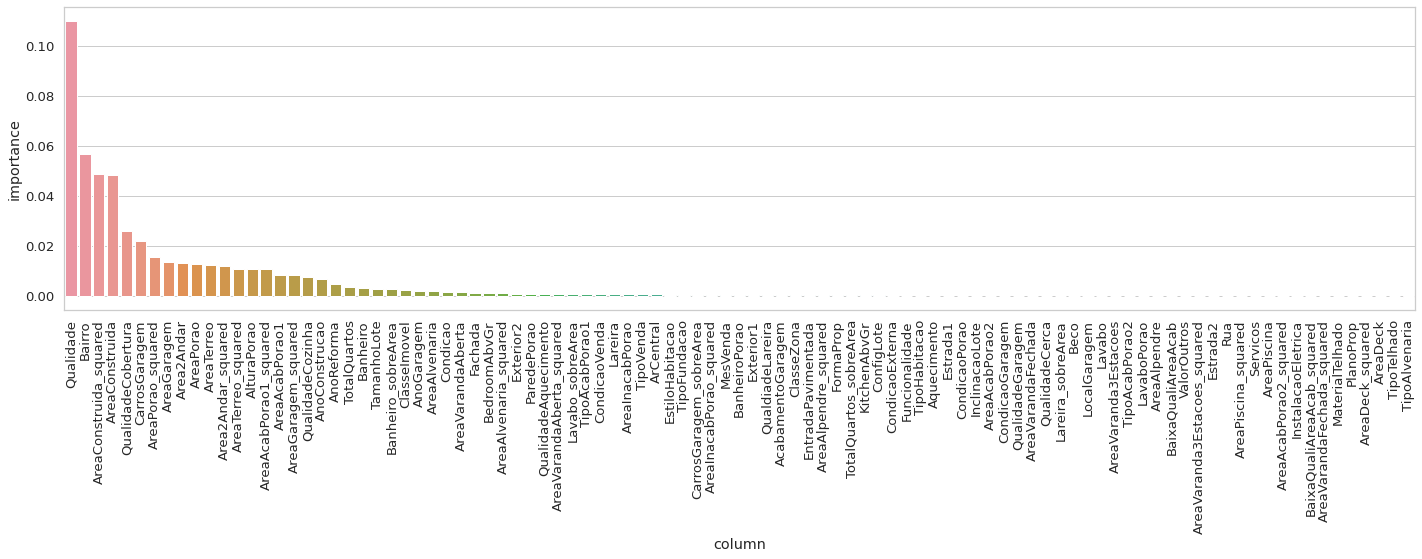

In [46]:
importances = pd.DataFrame({'column' : X_val.columns, 'importance': permutation_result.importances_mean})
importances.sort_values(by='importance', ascending=False, inplace=True)

fig, axs = plt.subplots(figsize=(20,8))
ax = sns.barplot(x='column', y="importance", data=importances)
plt.xticks(rotation=90)
plt.tight_layout()

In [47]:
# Getting the top 40 best features
best_features = importances.head(25).column.tolist()
print(best_features)

['Qualidade', 'Bairro', 'AreaConstruida_squared', 'AreaConstruida', 'QualidadeCobertura', 'CarrosGaragem', 'AreaPorao_squared', 'AreaGaragem', 'Area2Andar', 'AreaPorao', 'AreaTerreo', 'Area2Andar_squared', 'AreaTerreo_squared', 'AlturaPorao', 'AreaAcabPorao1_squared', 'AreaAcabPorao1', 'AreaGaragem_squared', 'QualidadeCozinha', 'AnoConstrucao', 'AnoReforma', 'TotalQuartos', 'Banheiro', 'TamanhoLote', 'Banheiro_sobreArea', 'ClasseImovel']


Retreinando o RandomForest apenas com as top 25 variáveis mais importantes

In [48]:
# Fitting the final RandomForest model
rf_model = RandomForestRegressor(n_estimators=150, max_features=0.3, min_samples_leaf= 1, random_state=42)
rf_model.fit(X_train[best_features], y_train)

# Computing predictions
y_train_pred = rf_model.predict(X_train[best_features])
y_val_pred = rf_model.predict(X_val[best_features])
y_test_pred = rf_model.predict(X_test[best_features])

# Computing the train, validation and test model performance metrics
train_report = metrics_report(y_train, y_train_pred, 'train')
val_report = metrics_report(y_val, y_val_pred, 'validation')
test_report = metrics_report(y_test, y_test_pred, 'test')

final_report = pd.concat([train_report, val_report[['validation']],  test_report[['test']]], axis=1)

print(f'Baseline report (total features: {len(features)})')
print(baseline_report)
print('')
print(f'Final report (total features: {len(best_features)})')
print(final_report)

Baseline report (total features: 97)
            metric  validation
0             RMSE    28201.24
1              MAE    16561.61
2              R^2        0.90
3             MAPE        0.09
4      Avg. target   174313.75
5  Avg. Prediction   171594.96

Final report (total features: 25)
            metric      train  validation       test
0             RMSE   11429.42    25767.45   23145.84
1              MAE    6582.12    16023.56   15290.42
2              R^2       0.98        0.91       0.91
3             MAPE       0.04        0.09       0.10
4      Avg. target  181312.69   174313.75  185701.65
5  Avg. Prediction  181146.06   172348.16  185848.09


Computanto a importancia das features do modelo final no dataset de test (held-out testing set)

Running permutation feature importance with the final model on the held-out testing set


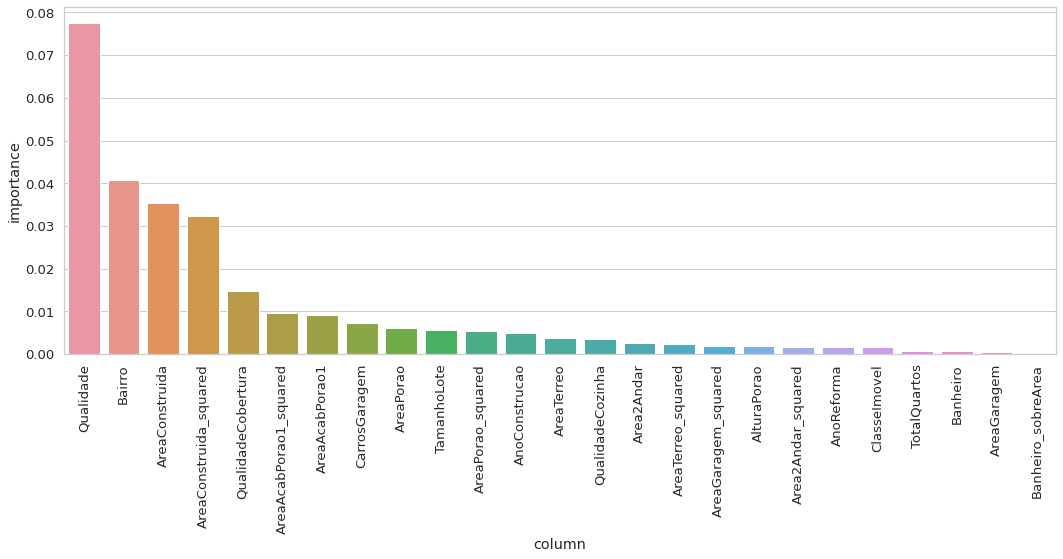

In [49]:
print('Running permutation feature importance with the final model on the held-out testing set')
permutation_result = permutation_importance(rf_model, X_test[best_features], y_test, n_repeats=5, random_state=42)

importances = pd.DataFrame({'column' : X_test[best_features].columns, 'importance': permutation_result.importances_mean})
importances.sort_values(by='importance', ascending=False, inplace=True)

fig, axs = plt.subplots(figsize=(15,8))
ax = sns.barplot(x='column', y="importance", data=importances)
plt.xticks(rotation=90)
plt.tight_layout()